In [4]:
import numpy as np
from scipy import stats
import pyvinecopulib as pv
import matplotlib.pyplot as plt
import matplotlib

In [26]:
copula = pv.Bicop(family=pv.BicopFamily.gaussian, parameters=[0.75]) 
u = copula.simulate(n=35, seeds = [2, 3, 3])

Text(0.5, 1.0, '(b) Samples of the river discharges where ${q_1 > 100 m^3/s}$')

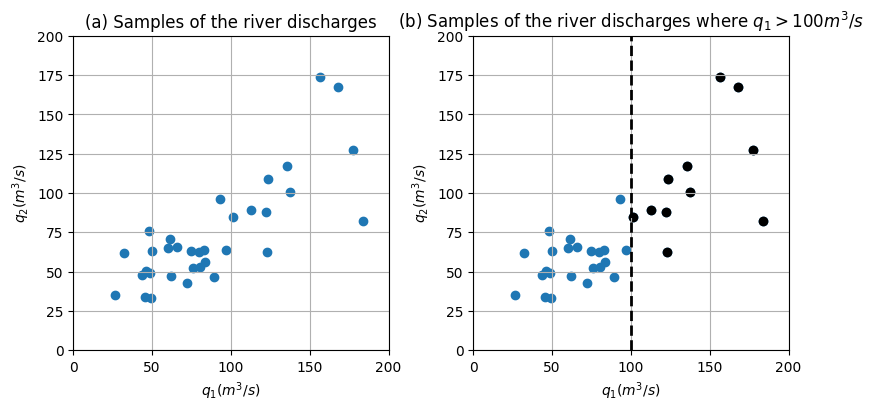

In [73]:
q1 = stats.gumbel_r.ppf(u[:,0],loc=76, scale=32)
q2 = stats.gumbel_r.ppf(u[:,1],loc=62, scale=27)

fig, axes = plt.subplots(1, 2, figsize=(8, 4), layout = 'constrained')

axes[0].scatter(q1, q2)
axes[0].set_xlim([0, 200])
axes[0].set_ylim([0, 200])
axes[0].set_xlabel('${q_1 (m^3/s)}$')
axes[0].set_ylabel('${q_2 (m^3/s)}$')
axes[0].grid()
axes[0].set_title('(a) Samples of the river discharges')

limit_q1 = 100
mask = q1>limit_q1

axes[1].scatter(q1, q2)
axes[1].scatter(q1[mask], q2[mask], color ='k')
axes[1].set_xlim([0, 200])
axes[1].set_ylim([0, 200])
axes[1].plot([100, 100], [0, 200], '--k', linewidth = 2)
axes[1].set_xlabel('${q_1 (m^3/s)}$')
axes[1].set_ylabel('${q_2 (m^3/s)}$')
axes[1].grid()
axes[1].set_title('(b) Samples of the river discharges where ${q_1 > 100 m^3/s}$')


In [110]:
# limit_q1 = 100
# mask = [(q1<limit_q1)]
# sum(mask).sum()

limit_q2 = 75
mask = [(q2<limit_q2)]
sum(mask).sum()

22

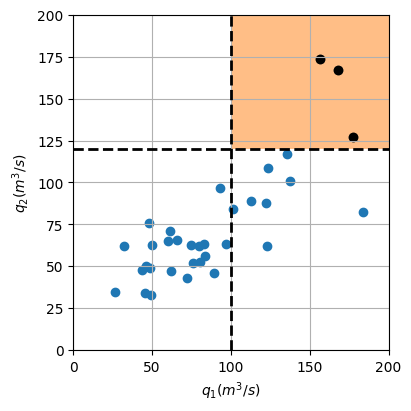

In [29]:
limit_q1 = 100
limit_q2 = 120
mask = [(q1>limit_q1) & (q2>limit_q2)]

fig, axes = plt.subplots(1, 1, figsize=(4, 4), layout = 'constrained')

axes.scatter(q1, q2)
axes.fill([limit_q1, 200, 200, limit_q1], [limit_q2, limit_q2, 200, 200], alpha = 0.5)
axes.scatter(q1[mask[0]], q2[mask[0]], color ='k')
axes.set_xlim([0, 200])
axes.set_ylim([0, 200])
axes.plot([limit_q1, limit_q1], [0, 200], '--k', linewidth = 2)
axes.plot([0, 200], [limit_q2, limit_q2], '--k', linewidth = 2)
axes.set_xlabel('${q_1 (m^3/s)}$')
axes.set_ylabel('${q_2 (m^3/s)}$')
axes.grid()

Text(0.5, 1.0, '(a) ${q_1 < 100 m^3/s \\cap q_2 < 50 m^3/s}$')

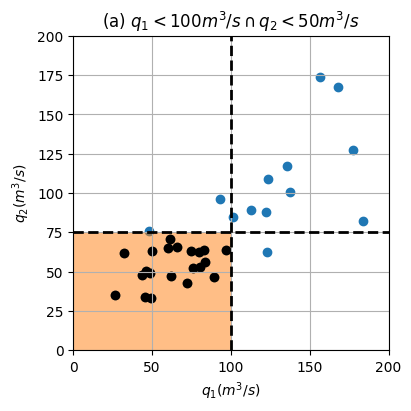

In [37]:
limit_q1 = 100
limit_q2 = 75
mask = [(q1<limit_q1) & (q2<limit_q2)]

fig, axes = plt.subplots(1, 1, figsize=(4, 4), layout = 'constrained')

axes.scatter(q1, q2)
axes.fill([0, limit_q1, limit_q1, 0], [0, 0, limit_q2, limit_q2], alpha = 0.5)
axes.scatter(q1[mask[0]], q2[mask[0]], color ='k')
axes.set_xlim([0, 200])
axes.set_ylim([0, 200])
axes.plot([limit_q1, limit_q1], [0, 200], '--k', linewidth = 2)
axes.plot([0, 200], [limit_q2, limit_q2], '--k', linewidth = 2)
axes.set_xlabel('${q_1 (m^3/s)}$')
axes.set_ylabel('${q_2 (m^3/s)}$')
axes.grid()
axes.set_title('(a) ${q_1 < 100 m^3/s \cap q_2 < 50 m^3/s}$')

In [70]:
23+22-21

24

Text(0.5, 1.0, '(c) ${q_1 < 100 m^3/s \\cup q_2 < 50 m^3/s}$')

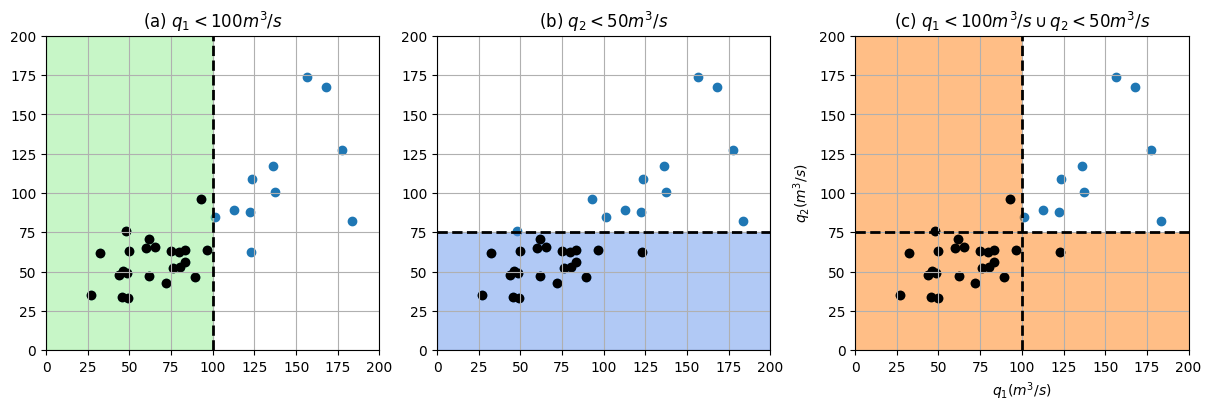

In [84]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4), layout = 'constrained')

mask = [(q1<limit_q1)]

axes[0].scatter(q1, q2)
axes[0].fill([0, limit_q1, limit_q1, 0], [0, 0, 200, 200], color = 'lightgreen', alpha = 0.5, label = '${q_2 \leq 75 m^3/s}$')
axes[0].scatter(q1[mask[0]], q2[mask[0]], color ='k')
axes[0].plot([limit_q1, limit_q1], [0, 200], '--k', linewidth = 2)
axes[0].grid()
axes[0].set_xlim([0, 200])
axes[0].set_ylim([0, 200])
axes[0].set_title('(a) ${q_1 < 100 m^3/s}$')


mask = [(q2<limit_q2)]

axes[1].scatter(q1, q2)
axes[1].fill([0, 200, 200, 0], [0, 0, limit_q2, limit_q2], color = 'cornflowerblue', alpha = 0.5, label = '${q_2 \leq 75 m^3/s}$')
axes[1].scatter(q1[mask[0]], q2[mask[0]], color ='k')
axes[1].plot([0, 200], [limit_q2, limit_q2], '--k', linewidth = 2)
axes[1].grid()
axes[1].set_xlim([0, 200])
axes[1].set_ylim([0, 200])
axes[1].set_title('(b) ${q_2 < 50 m^3/s}$')


mask = [(q1<limit_q1) | (q2<limit_q2)]

axes[2].scatter(q1, q2)
# axes[2].fill([0, limit_q1, limit_q1, 0], [0, 0, limit_q2, limit_q2], alpha = 0.5)
axes[2].fill([0, 200, 200, limit_q1, limit_q1, 0, 0], [0, 0, limit_q2, limit_q2, 200, 200, 0], alpha = 0.5)
# axes[2].fill([0, limit_q1, limit_q1, 0], [0, 0, limit_q2, limit_q2], alpha = 0.5)
axes[2].scatter(q1[mask[0]], q2[mask[0]], color ='k')
axes[2].set_xlim([0, 200])
axes[2].set_ylim([0, 200])
axes[2].plot([limit_q1, limit_q1], [0, 200], '--k', linewidth = 2)
axes[2].plot([0, 200], [limit_q2, limit_q2], '--k', linewidth = 2)
axes[2].set_xlabel('${q_1 (m^3/s)}$')
axes[2].set_ylabel('${q_2 (m^3/s)}$')
axes[2].grid()
axes[2].set_title('(c) ${q_1 < 100 m^3/s \cup q_2 < 50 m^3/s}$')




Text(0.5, 1.0, '(c) ${q_1 > 100 m^3/s \\cap q_2 > 50 m^3/s}$')

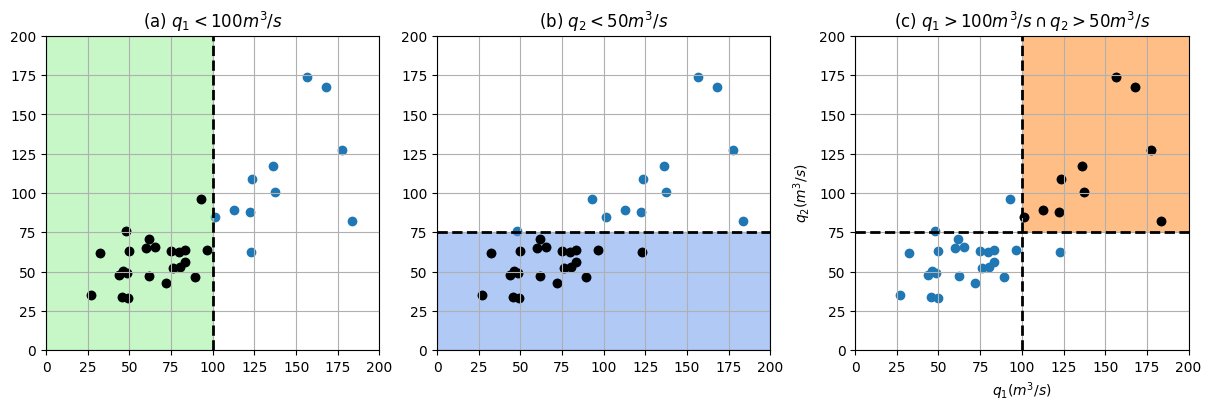

In [86]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4), layout = 'constrained')

mask = [(q1<limit_q1)]

axes[0].scatter(q1, q2)
axes[0].fill([0, limit_q1, limit_q1, 0], [0, 0, 200, 200], color = 'lightgreen', alpha = 0.5, label = '${q_2 \leq 75 m^3/s}$')
axes[0].scatter(q1[mask[0]], q2[mask[0]], color ='k')
axes[0].plot([limit_q1, limit_q1], [0, 200], '--k', linewidth = 2)
axes[0].grid()
axes[0].set_xlim([0, 200])
axes[0].set_ylim([0, 200])
axes[0].set_title('(a) ${q_1 < 100 m^3/s}$')


mask = [(q2<limit_q2)]

axes[1].scatter(q1, q2)
axes[1].fill([0, 200, 200, 0], [0, 0, limit_q2, limit_q2], color = 'cornflowerblue', alpha = 0.5, label = '${q_2 \leq 75 m^3/s}$')
axes[1].scatter(q1[mask[0]], q2[mask[0]], color ='k')
axes[1].plot([0, 200], [limit_q2, limit_q2], '--k', linewidth = 2)
axes[1].grid()
axes[1].set_xlim([0, 200])
axes[1].set_ylim([0, 200])
axes[1].set_title('(b) ${q_2 < 50 m^3/s}$')


mask = [(q1>limit_q1) & (q2>limit_q2)]

axes[2].scatter(q1, q2)
axes[2].fill([limit_q1, 200, 200, limit_q1], [limit_q2, limit_q2, 200, 200], alpha = 0.5)
axes[2].scatter(q1[mask[0]], q2[mask[0]], color ='k')
axes[2].set_xlim([0, 200])
axes[2].set_ylim([0, 200])
axes[2].plot([limit_q1, limit_q1], [0, 200], '--k', linewidth = 2)
axes[2].plot([0, 200], [limit_q2, limit_q2], '--k', linewidth = 2)
axes[2].set_xlabel('${q_1 (m^3/s)}$')
axes[2].set_ylabel('${q_2 (m^3/s)}$')
axes[2].grid()
axes[2].set_title('(c) ${q_1 > 100 m^3/s \cap q_2 > 50 m^3/s}$')

Text(0.5, 1.0, '(b) ${q_2 >150 m^3/s | q_1 > 130 m^3/s}$')

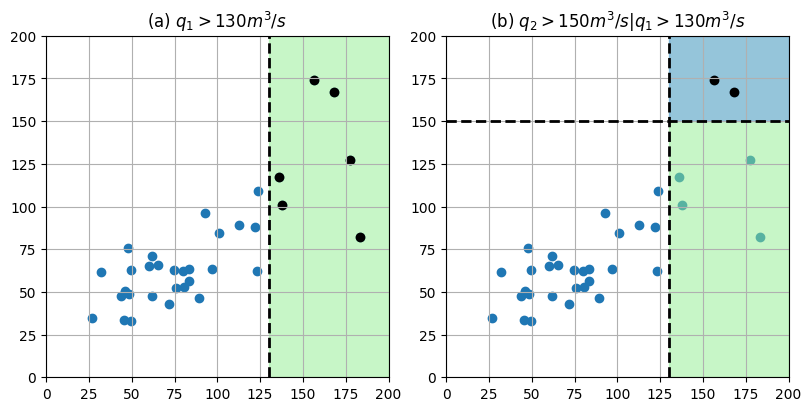

In [105]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4), layout = 'constrained')

limit_q1 = 130

mask = [(q1>limit_q1)]

axes[0].scatter(q1, q2)
axes[0].fill([limit_q1, 200, 200, limit_q1], [0, 0, 200, 200], color = 'lightgreen', alpha = 0.5)
axes[0].scatter(q1[mask[0]], q2[mask[0]], color ='k')
axes[0].plot([limit_q1, limit_q1], [0, 200], '--k', linewidth = 2)
axes[0].grid()
axes[0].set_xlim([0, 200])
axes[0].set_ylim([0, 200])
axes[0].set_title('(a) ${q_1 > 130 m^3/s}$')

limit_q2 = 150
mask = [(q1>limit_q1) & (q2>limit_q2)]

axes[1].scatter(q1, q2)
axes[1].fill([limit_q1, 200, 200, limit_q1], [0, 0, 200, 200], color = 'lightgreen', alpha = 0.5)
axes[1].fill([limit_q1, 200, 200, limit_q1], [limit_q2, limit_q2, 200, 200], color = 'cornflowerblue', alpha = 0.5, label = '${q_2 \leq 75 m^3/s}$')
axes[1].scatter(q1[mask[0]], q2[mask[0]], color ='k')
axes[1].plot([limit_q1, limit_q1], [0, 200], '--k', linewidth = 2)
axes[1].plot([0, 200], [limit_q2, limit_q2], '--k', linewidth = 2)
axes[1].grid()
axes[1].set_xlim([0, 200])
axes[1].set_ylim([0, 200])
axes[1].set_title('(b) ${q_2 >150 m^3/s | q_1 > 130 m^3/s}$')